PRINCIPAIS OBJETIVOS DA ANÁLISE:

- fornecer as seguintes métricas gerais: total de compras pelo catálogo e pela loja e a distribuição da idade e do estado civil dos clientes;
- entender quais fatores influenciam o número de compras feitas utilizando o catálogo (produtos que serão enviados pelos correios);
- entender quais fatores influenciam a aceitação dos clientes sobre a campanha de marketing do supermercado;
- dentre os fatores, selecionar os dois que mais impactam e mostrar a relação deles com a variável correspondente;
- por fim, permitir que todos os indicadores construídos sejam filtrados pelo nível de escolaridade dos clientes.

Importação das bibliotecas

In [48]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importação da base de dados

In [49]:
df = pd.read_csv('superstore_data.csv')

Criação, conexão e importação da base para o banco de dados e tratamentos iniciais com SQL

In [50]:
# Criação e conexão com o banco de dados
conn = sqlite3.connect('supermercado.db')
cursor = conn.cursor()

# Criação da tabela no banco de dados criado acima
cursor.execute('''
CREATE TABLE IF NOT EXISTS dadosmarketing (
    Id INTEGER PRIMARY KEY,
    Year_Birth INTEGER,
    Education TEXT,
    Marital_Status TEXT,
    Income INTEGER,
    Kidhome INTEGER,
    Teenhome INTEGER,
    Dt_Customer DATE,
    Recency INTEGER,
    MntWines INTEGER,
    MntFruits INTEGER,
    MntMeatProducts INTEGER,
    MntFishProducts INTEGER,
    MntSweetProducts INTEGER,
    MntGoldProds INTEGER,
    NumDealsPurchases INTEGER,
    NumWebPurchases INTEGER,
    NumCatalogPurchases INTEGER,
    NumStorePurchases INTEGER,
    NumWebVisitsMonth INTEGER,
    Response INTEGER,
    Complain INTEGER
);
''')

# Inserção da base de dados na tabela criada
df.to_sql('dadosmarketing', conn, if_exists='replace', index=False)

# Adicionar a coluna 'Age' na tabela para calcular a idade dos clientes com base na coluna 'Year_Birth'
cursor.execute('''
ALTER TABLE dadosmarketing ADD COLUMN Age INTEGER;
''')

cursor.execute('''
UPDATE dadosmarketing
SET Age = strftime('%Y', 'now') - Year_Birth;
''')

# Adicionar a coluna 'Income_Month' para calcular a renda mensal com base na coluna 'Income'
cursor.execute('''
ALTER TABLE dadosmarketing ADD COLUMN Income_Month INTEGER;
''')

cursor.execute('''
UPDATE dadosmarketing
SET Income_Month = Income / 12;
''')

# Importar os dados da tabela para o DataFrame df2
df2 = pd.read_sql_query("SELECT * FROM dadosmarketing", conn)

# Salvar as mudanças e encerrar a conexão
conn.commit()
conn.close()

Análise exploratória - limpeza e tratamento dos dados

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [52]:
df2.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Income_Month
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,218,1,4,4,6,1,1,0,54,7069.583333
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,37,1,7,3,7,5,1,0,63,4757.583333
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,30,1,3,2,5,2,0,0,66,5605.583333
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,1,1,0,2,7,0,0,57,2706.166667
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,34,2,3,1,2,7,1,0,35,1789.500000


In [53]:
df2.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [60]:
df2 = df2.dropna()
df2['Income'] = df2['Income'].round(0).astype('int64')
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])
df2['Income_Month'] = df2['Income_Month'].round(0).astype('int64')
df2.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Income_Month
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,7070
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,4758
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,5606
3,1386,1967,Graduation,Together,32474,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,2706
4,5371,1989,Graduation,Single,21474,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,1790


In [55]:
# Salvar o DataFrame df2 (conteúdo do banco de dados limpo e tratado) em um arquivo CSV
df2.to_csv('dadosmarketing.csv', index=False)

Análise exploratória - análise estatística básica e visualização dos dados

In [56]:
df2.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Income_Month
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,...,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477,55.179603,4353.936372
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,144.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,47.000000,2942.250000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,...,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,54.000000,4281.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000,5710.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,131.000000,55556.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907,11.985554,2097.753411


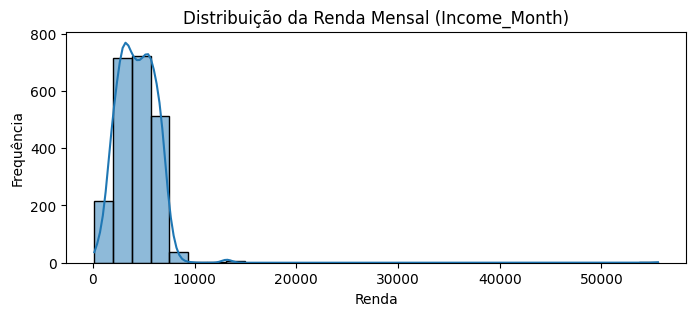

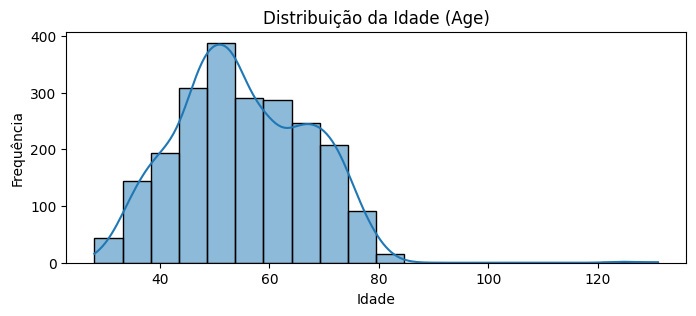

In [57]:
# Distribuição de renda dos clientes
plt.figure(figsize=(8, 3))
sns.histplot(df2['Income_Month'], bins=30, kde=True)
plt.title('Distribuição da Renda Mensal (Income_Month)')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

# Distribuição da idade dos clientes
plt.figure(figsize=(8, 3))
sns.histplot(df2['Age'], bins=20, kde=True)
plt.title('Distribuição da Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

<ipython-input-58-10780ac020fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df2, palette='viridis')


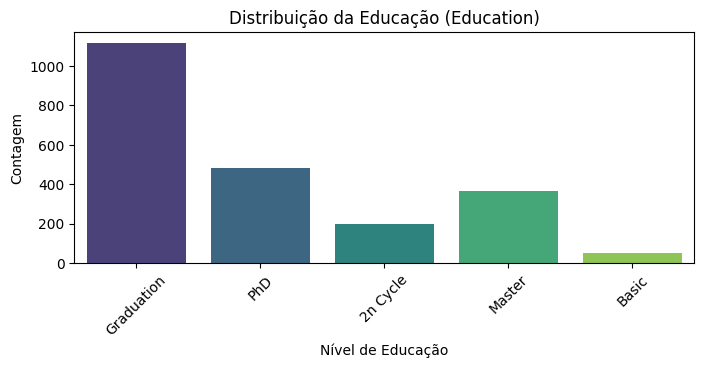

<ipython-input-58-10780ac020fb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df2, palette='Set2')


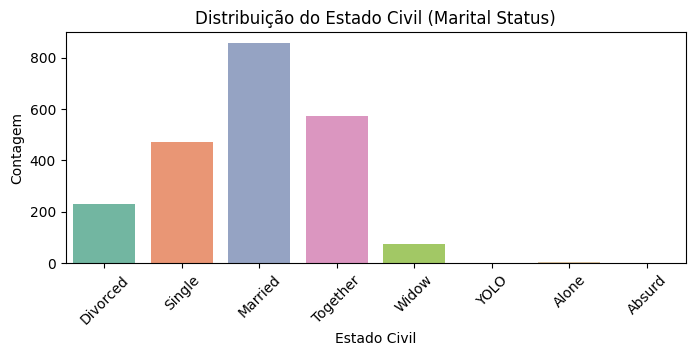

In [58]:
# Distribuição do nível de escolaridade dos clientes
plt.figure(figsize=(8, 3))
sns.countplot(x='Education', data=df2, palette='viridis')
plt.title('Distribuição da Educação (Education)')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Distribuição do estado civil dos clientes
plt.figure(figsize=(8, 3))
sns.countplot(x='Marital_Status', data=df2, palette='Set2')
plt.title('Distribuição do Estado Civil (Marital Status)')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

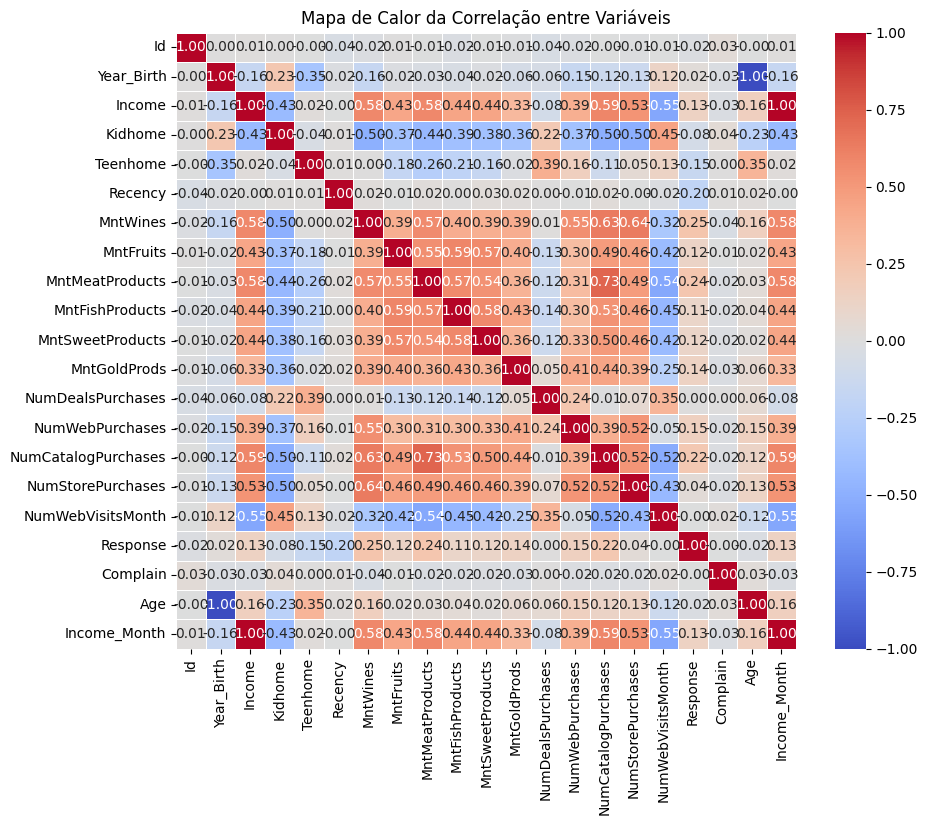

In [59]:
# Matriz de correlação entre as variáveis numéricas e visualização com mapa de calor
numerical_data = df2.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()